# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

df = pd.read_csv("Mall_Customers.csv", index_col = 0)
data = df
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [25]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [32]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

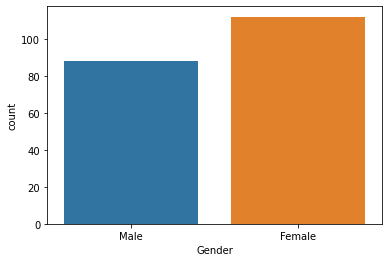

In [33]:
sns.countplot(data['Gender'])

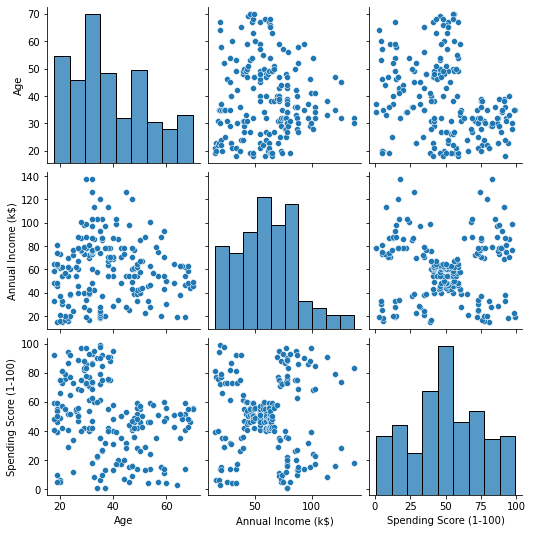

In [34]:
sns.pairplot(data)

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

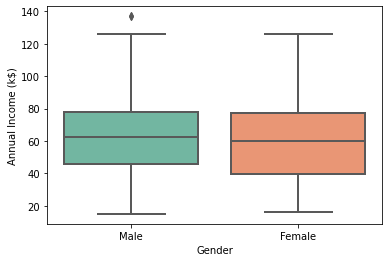

In [35]:
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, palette = 'Set2', linewidth=2)

#### anual income과 spending score가 clustering 에 용이

## Data preprocessig

In [69]:
from sklearn.preprocessing import MinMaxScaler

#스케일링
def scaling(df):
    columns = df.columns.tolist()
    
    scaler = MinMaxScaler()

    for col in columns:
        df.loc[:, col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1))
    
    return df

In [70]:
# 필요한 라이브러리, 함수 정의
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def elbow(x):
    k = []
    sse = []
    
    for i in range(1, 11):
        model = KMeans(n_clusters = i)
        model.fit(x)
        sse.append(model.inertia_)
        k.append(i)
        
    plt.plot(k, sse, marker='o')
    plt.xlabel("number of cluster")
    plt.ylabel("SSE")
    plt.xticks(range(1, 11))
    plt. show()
    
def get_kmeans_silhouette(df):
    best_n = 1
    best_score = -1

    for n_cluster in range(2, 11):
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(df)
        cluster = kmeans.predict(df)
        score = silhouette_score(df, cluster)

        print("클러스터의 수 : {}, 실루엣 점수 : {:.3f}".format(n_cluster, score))
        if score > best_score:
            best_n = n_cluster
            best_score = score

    print("\n가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.3f}".format(best_n, best_score))

## K-means

In [90]:
data_exGen = data.drop("Gender", axis =1)
data_exGen_sc = scaling(data_exGen)

클러스터의 수 : 2, 실루엣 점수 : 0.337
클러스터의 수 : 3, 실루엣 점수 : 0.466
클러스터의 수 : 4, 실루엣 점수 : 0.515
클러스터의 수 : 5, 실루엣 점수 : 0.572
클러스터의 수 : 6, 실루엣 점수 : 0.572
클러스터의 수 : 7, 실루엣 점수 : 0.460
클러스터의 수 : 8, 실루엣 점수 : 0.441
클러스터의 수 : 9, 실루엣 점수 : 0.472
클러스터의 수 : 10, 실루엣 점수 : 0.474

가장 높은 실루엣 점수를 가진 클러스터 수 : 5, 실루엣 점수 : 0.572


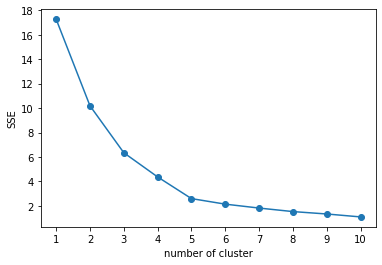

In [91]:
data_anual_spend = data_exGen_sc_train.iloc[:, 1:]
get_kmeans_silhouette(data_anual_spend)
elbow(data_anual_spend)

In [92]:
# k가 5인 Kmean 선언
kmeans = KMeans(n_clusters = 5)
# 모델 학습
kmeans.fit(data_anual_spend)
# cluster 할당
cluster = kmeans.predict(data_anual_spend)

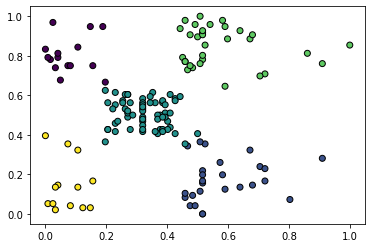

In [93]:
plt.scatter(data_anual_spend['Annual Income (k$)'], data_anual_spend['Spending Score (1-100)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

In [115]:
score = silhouette_score(data_anual_spend, cluster, metric='euclidean')

print("Silhouette Coefficient: {:.3f}".format(score))

Silhouette Coefficient: 0.572


## Hierarchical Clustering

In [94]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

single_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='single')

# 학습
single_cluster = single_clustering.fit_predict(data_anual_spend)

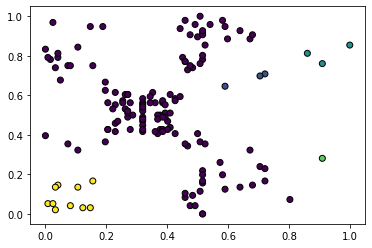

In [95]:
plt.scatter(data_anual_spend['Annual Income (k$)'], data_anual_spend['Spending Score (1-100)'], linewidth = 1, c = single_cluster, edgecolor = 'black')
plt.show()

In [114]:
score = silhouette_score(data_anual_spend, single_cluster, metric='euclidean')

print("Silhouette Coefficient: {:.3f}".format(score))

Silhouette Coefficient: 0.092


In [96]:
complete_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='complete')

complete_cluster = complete_clustering.fit_predict(data_anual_spend)

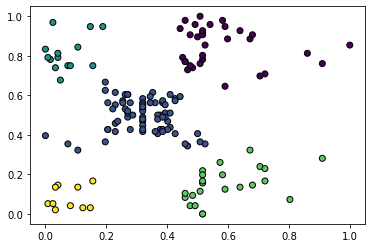

In [97]:
plt.scatter(data_anual_spend['Annual Income (k$)'], data_anual_spend['Spending Score (1-100)'], linewidth = 1, c = complete_cluster, edgecolor = 'black')
plt.show()

In [113]:
score = silhouette_score(data_anual_spend, complete_cluster, metric='euclidean')

print("Silhouette Coefficient: {:.3f}".format(score))

Silhouette Coefficient: 0.571


In [98]:
average_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='average')

average_cluster = average_clustering.fit_predict(data_anual_spend)

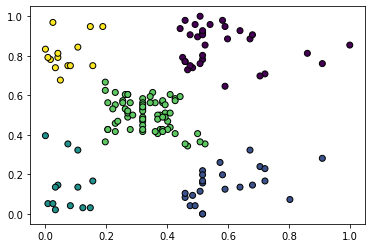

In [99]:
plt.scatter(data_anual_spend['Annual Income (k$)'], data_anual_spend['Spending Score (1-100)'], linewidth = 1, c = average_cluster, edgecolor = 'black')
plt.show()

In [112]:
score = silhouette_score(data_anual_spend, average_cluster, metric='euclidean')

print("Silhouette Coefficient: {:.3f}".format(score))

Silhouette Coefficient: 0.577


In [100]:
ward_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='ward')

ward_cluster = ward_clustering.fit_predict(data_anual_spend)

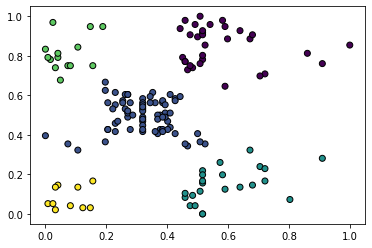

In [101]:
plt.scatter(data_anual_spend['Annual Income (k$)'], data_anual_spend['Spending Score (1-100)'], linewidth = 1, c = ward_cluster, edgecolor = 'black')
plt.show()

In [111]:
score = silhouette_score(data_anual_spend, ward_cluster, metric='euclidean')

print("Silhouette Coefficient: {:.3f}".format(score))

Silhouette Coefficient: 0.571


## DBSCAN

In [102]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN()

In [103]:
dbscan_cluster = dbscan.fit_predict(data_anual_spend)

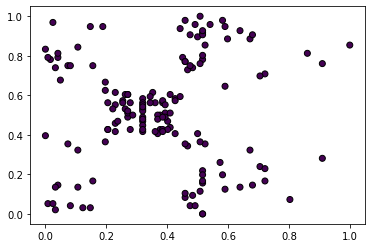

In [104]:
plt.scatter(data_anual_spend['Annual Income (k$)'], data_anual_spend['Spending Score (1-100)'], linewidth = 1, c = dbscan_cluster, edgecolor = 'black')
plt.show()


score = silhouette_score(data_anual_spend, dbscan_cluster, metric='euclidean')

print("Silhouette Coefficient: {:.3f}".format(score))

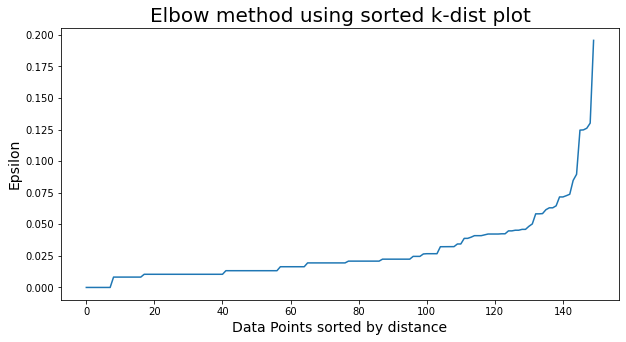

In [105]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(data_anual_spend)
distances, indices = neighbors.kneighbors(data_anual_spend)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Elbow method using sorted k-dist plot',fontsize=20) # K-distance Graph
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

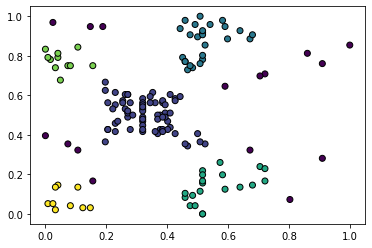

In [107]:
dbscan = DBSCAN(eps=0.09, min_samples=5)
dbscan_cluster = dbscan.fit_predict(data_anual_spend)

plt.scatter(data_anual_spend['Annual Income (k$)'], data_anual_spend['Spending Score (1-100)'], linewidth = 1, c = dbscan_cluster, edgecolor = 'black')
plt.show()

In [110]:
score = silhouette_score(data_anual_spend, dbscan_cluster, metric='euclidean')

print("Silhouette Coefficient: {:.3f}".format(score))

Silhouette Coefficient: 0.502
